In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
data, info = tfds.load("imagenette/160px-v2", with_info=True, as_supervised=True)
train_data, valid_data = data['train'], data['validation']

del data

2023-12-13 06:44:21.590859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-13 06:44:21.598948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-13 06:44:21.599128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-13 06:44:21.599567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [4]:
train_dataset = train_data.map(
    lambda image, label: (tf.image.resize(image, (160, 160)), label))

validation_dataset = valid_data.map(
    lambda image, label: (tf.image.resize(image, (160, 160)), label)
)

del train_data
del valid_data

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
train_dataset

<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Number of classes to predict and its label names

In [8]:
num_classes = info.features['label'].num_classes
print(f'Total number of classes in dataset is {num_classes}')

Total number of classes in dataset is 10


In [10]:
get_label_name = info.features['label'].int2str
text_labels = [get_label_name(i) for i in range(num_classes)]
for idx,i in enumerate(text_labels):
    print(f'The Label {idx} name is `{i}`')

The Label 0 name is `n01440764`
The Label 1 name is `n02102040`
The Label 2 name is `n02979186`
The Label 3 name is `n03000684`
The Label 4 name is `n03028079`
The Label 5 name is `n03394916`
The Label 6 name is `n03417042`
The Label 7 name is `n03425413`
The Label 8 name is `n03445777`
The Label 9 name is `n03888257`


## Unzipping the prefected dataset into X and y for train and valid

In [11]:
%%time

X_train = list(map(lambda x: x[0], train_dataset))
y_train = list(map(lambda x: x[1], train_dataset))


X_valid = list(map(lambda x: x[0], validation_dataset))
y_valid = list(map(lambda x: x[1], validation_dataset))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes)

del train_dataset
del validation_dataset

CPU times: user 8.53 s, sys: 1.13 s, total: 9.66 s
Wall time: 2.99 s


## Number of training and valid examples

In [12]:
train_len = info.splits['train'].num_examples
valid_len = info.splits['validation'].num_examples
print(f'Train size {train_len} and Valid size {valid_len}')

Train size 9469 and Valid size 3925


In [13]:
y_train.shape,y_valid.shape

((9469, 10), (3925, 10))

In [ ]:
# Clear GPU Memory
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

## Just for plotting the prefected dataset

In [ ]:
# # to use below lines you may need to undelete the train_data
# get_label_name = info.features['label'].int2str
# image, label = next(iter(train_data))
# plt.imshow(image)
# plt.title(get_label_name(label))

## ImageDataGenerator to perform augmentation on dataset

In [14]:
%%time
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
      rescale=1./255)


train_ds = tf.keras.preprocessing.image.NumpyArrayIterator(
    x=np.array(X_train), y=np.array(y_train), image_data_generator=train_datagen,batch_size=16
)

valid_ds = tf.keras.preprocessing.image.NumpyArrayIterator(
    x=np.array(X_valid), y=np.array(y_valid), image_data_generator=valid_datagen,batch_size=32
)

# train_datagen.fit(X_train)

CPU times: user 392 ms, sys: 166 ms, total: 558 ms
Wall time: 557 ms


In [15]:
train_ds.__len__(),valid_ds.__len__() #depends on batching 

(592, 123)

Text(0.5, 1.0, 'n02979186')

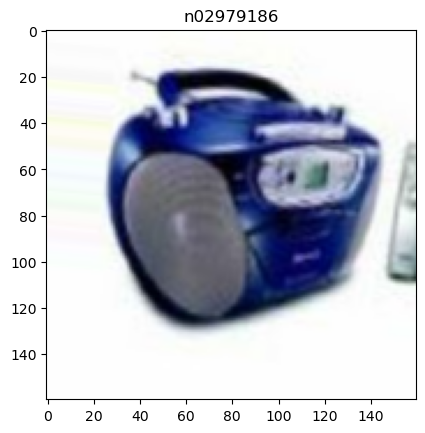

In [16]:
# # to use below lines you may need to undelete the train_data
image, label = next(iter(train_ds))
plt.imshow(image[0])
plt.title(get_label_name(np.argmax(label)))

## Plotting Augmented dataset

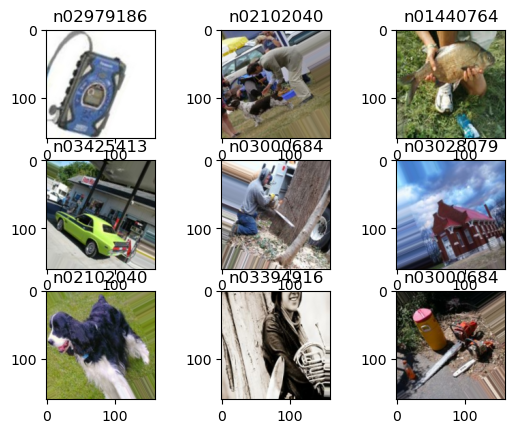

In [17]:
# configure batch size and retrieve one batch of images
# # to use below lines you may need to undelete the train_data
# image, label = next(iter(train_ds))
# plt.imshow(image[0])
# plt.title(get_label_name(np.argmax(label)))

# create a grid of 3x3 images
for i in range(0, 9):
    image,label = next(iter(train_ds))
    plt.subplot(330 + 1 + i)
    plt.imshow(image[0])
    plt.title(get_label_name(np.argmax(label)))
# show the plot
plt.show()


In [18]:
%cd  /home/reynier/py_projects/Deployments/functions

/home/reynier/py_projects/Deployments/functions


In [19]:
from Nets import GetNeuralNetworkModel
from Stats import WeightQuantization, ActivationStats, CheckAccuracyAndLoss, QuantizationEffect, GetReadAndWrites
from FileAnalize import analize_file, analize_file_uno,analize_file_uno_ceros, save_file, load_file
from funciones import buffer_vectores
from Simulation import buffer_simulation, save_obj, load_obj
from Training import GetDatasets

In [20]:
model = GetNeuralNetworkModel('Xception',(160,160,3),10, quantization = False, aging_active=False)

In [21]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True,
    verbose=1
    )

In [28]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
epochs = 500
history = model.fit(train_ds, epochs=epochs, validation_data=valid_ds, callbacks=[callback])

In [31]:
score = model.evaluate(train_ds, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

592/592 [==============================] - 42s 70ms/step - loss: 0.5450 - accuracy: 0.8235
Test loss: 0.5450431108474731
Test accuracy: 0.8235294222831726


In [33]:
score = model.evaluate(valid_ds, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

  1/123 [..............................] - ETA: 17s - loss: 0.5981 - accuracy: 0.7500

/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


123/123 [==============================] - 8s 66ms/step - loss: 0.7869 - accuracy: 0.7603
Test loss: 0.786941647529602
Test accuracy: 0.7602548003196716


In [29]:
%cd  /home/reynier/py_projects/Deployments/imagenette_dataset/Weights/Xception/V1

/home/reynier/py_projects/Deployments/imagenette_dataset/Weights/Xception/V1


In [30]:
model.load_weights('weights.data')

In [32]:
df = QuantizationEffect('Xception',valid_ds,'weights.data',(160,160,3),10,256)

Activation fraction part
0  bits results:  acc:  0.09834394603967667 loss:  4.357632637023926


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))


1  bits results:  acc:  0.09834394603967667 loss:  4.176076412200928
2  bits results:  acc:  0.17222930490970612 loss:  6.218079090118408


/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3  bits results:  acc:  0.4252229332923889 loss:  2.2123920917510986


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4  bits results:  acc:  0.6965605020523071 loss:  0.9857717752456665


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5  bits results:  acc:  0.7482802271842957 loss:  0.8236122727394104


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6  bits results:  acc:  0.7582165598869324 loss:  0.7952436804771423


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7  bits results:  acc:  0.7607643604278564 loss:  0.7893344163894653


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8  bits results:  acc:  0.7597452402114868 loss:  0.7868903279304504


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9  bits results:  acc:  0.7597452402114868 loss:  0.7869371771812439


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10  bits results:  acc:  0.7599999904632568 loss:  0.7869811654090881


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11  bits results:  acc:  0.7602548003196716 loss:  0.7869819402694702


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12  bits results:  acc:  0.7599999904632568 loss:  0.7869412899017334


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13  bits results:  acc:  0.7602548003196716 loss:  0.7869555950164795


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14  bits results:  acc:  0.7599999904632568 loss:  0.7869435548782349
Weights fraction part


/home/reynier/py_projects/Deployments/functions/Stats.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


0  bits results:  acc:  0.09859872609376907 loss:  2.3025827407836914


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1  bits results:  acc:  0.09859872609376907 loss:  2.3025827407836914


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2  bits results:  acc:  0.09859872609376907 loss:  2.3025827407836914


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3  bits results:  acc:  0.10038216412067413 loss:  8.345712661743164


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4  bits results:  acc:  0.10140127688646317 loss:  109806.2734375


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5  bits results:  acc:  0.10165604948997498 loss:  158627.46875


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6  bits results:  acc:  0.10165604948997498 loss:  6476.61083984375


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7  bits results:  acc:  0.11286624521017075 loss:  40.8712272644043


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8  bits results:  acc:  0.6420382261276245 loss:  1.6870309114456177


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9  bits results:  acc:  0.7462420463562012 loss:  0.8198246955871582


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10  bits results:  acc:  0.7577069997787476 loss:  0.7949538230895996


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11  bits results:  acc:  0.7599999904632568 loss:  0.7875112295150757


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12  bits results:  acc:  0.7612738609313965 loss:  0.7865017056465149


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13  bits results:  acc:  0.7605095505714417 loss:  0.7884126305580139


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14  bits results:  acc:  0.7602548003196716 loss:  0.7867850661277771
Activation integer part


/home/reynier/py_projects/Deployments/functions/Stats.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights fraction part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


0  bits results:  acc:  0.1021656021475792 loss:  3.200551748275757


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1  bits results:  acc:  0.2382165640592575 loss:  2.93188738822937


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2  bits results:  acc:  0.4402547776699066 loss:  1.7002447843551636


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3  bits results:  acc:  0.681273877620697 loss:  0.9861339926719666


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4  bits results:  acc:  0.7500637173652649 loss:  0.7901663780212402


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5  bits results:  acc:  0.7584713101387024 loss:  0.7852615118026733


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6  bits results:  acc:  0.7597452402114868 loss:  0.7869298458099365


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142
Weights integer part


/home/reynier/py_projects/Deployments/functions/Stats.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Activation integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


0  bits results:  acc:  0.7643312215805054 loss:  0.7657774686813354


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
/home/reynier/anaconda3/envs/brain_histology_projects/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14  bits results:  acc:  0.7599999904632568 loss:  0.7869278192520142


/home/reynier/py_projects/Deployments/functions/Stats.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Experiment':['Weights integer part'],'bits':[bit],'acc':[acc],'loss':[loss]}))
